###  Installing and Checking Requirements

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5
!pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)


Setup complete ✅ (20 CPUs, 15.5 GB RAM, 110.1/1006.9 GB disk)


### Traffic Sign Dataset




In [ ]:
## Data contains 15 classes
## nc: 15
## names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

## dowloaded from kaggle
## https://www.kaggle.com/datasets/pkdarabi/cardetection


### Training YoloV5s Model on Custom Data

In [2]:
!python train.py --img 416 --batch 16 --epochs 30 --data data.yaml --weights yolov5s.pt --cache disk

2024-02-20 15:19:49.986457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 15:19:49.986509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 15:19:50.011854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=disk, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [4]:
from IPython.display import Image #this is to render predictions

### Output Results

In [ ]:
Image(filename='run')

### Output Results

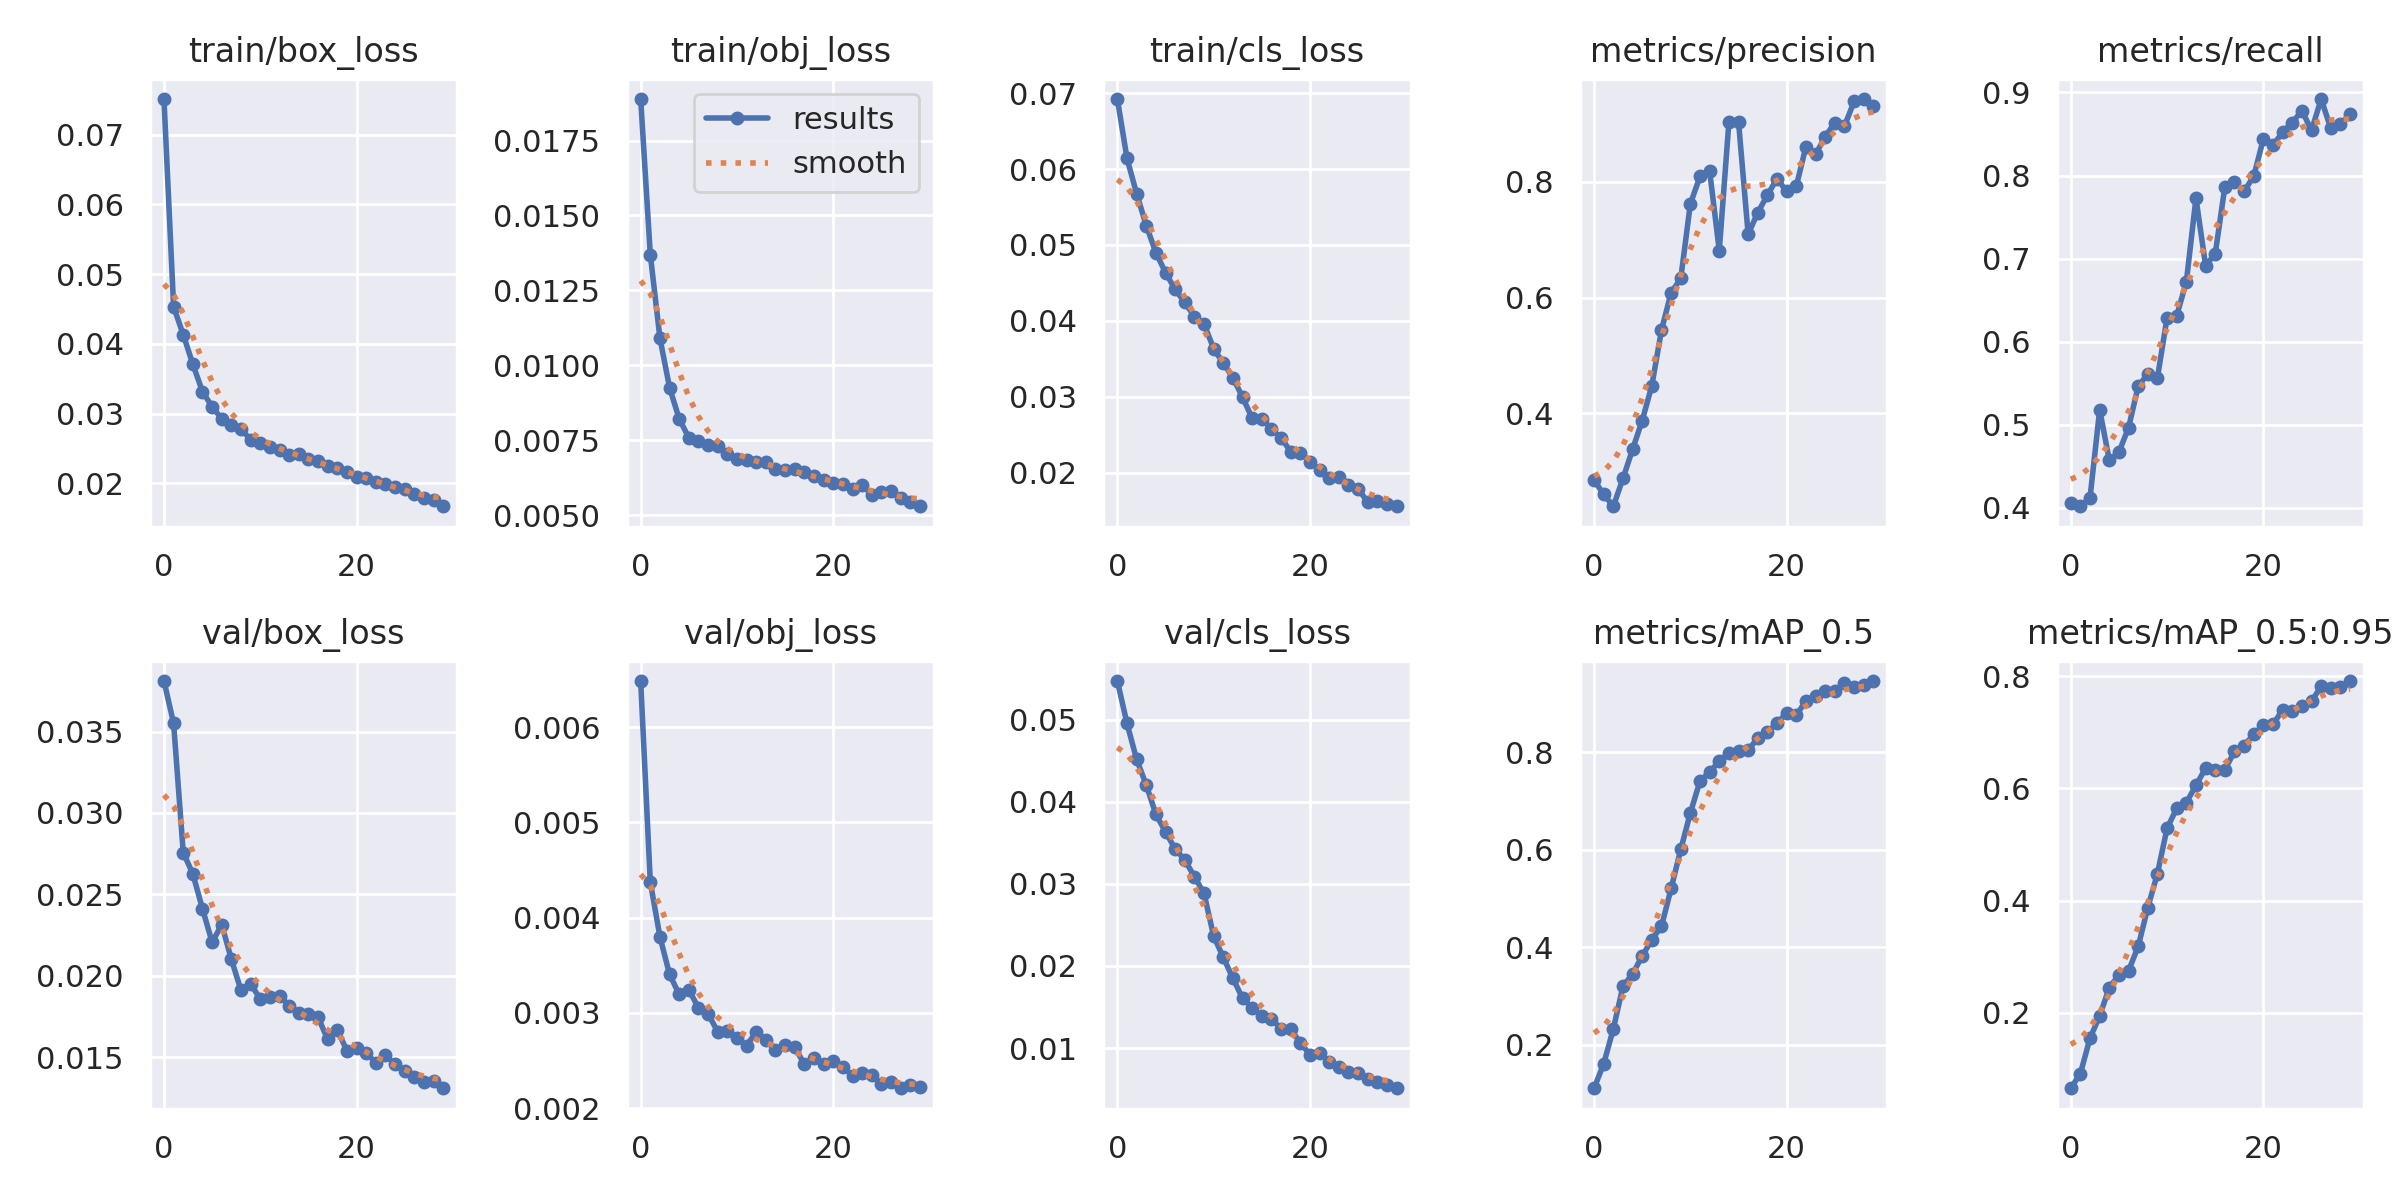

In [17]:
Image(filename='runs/train/exp/results.png', width=1000)

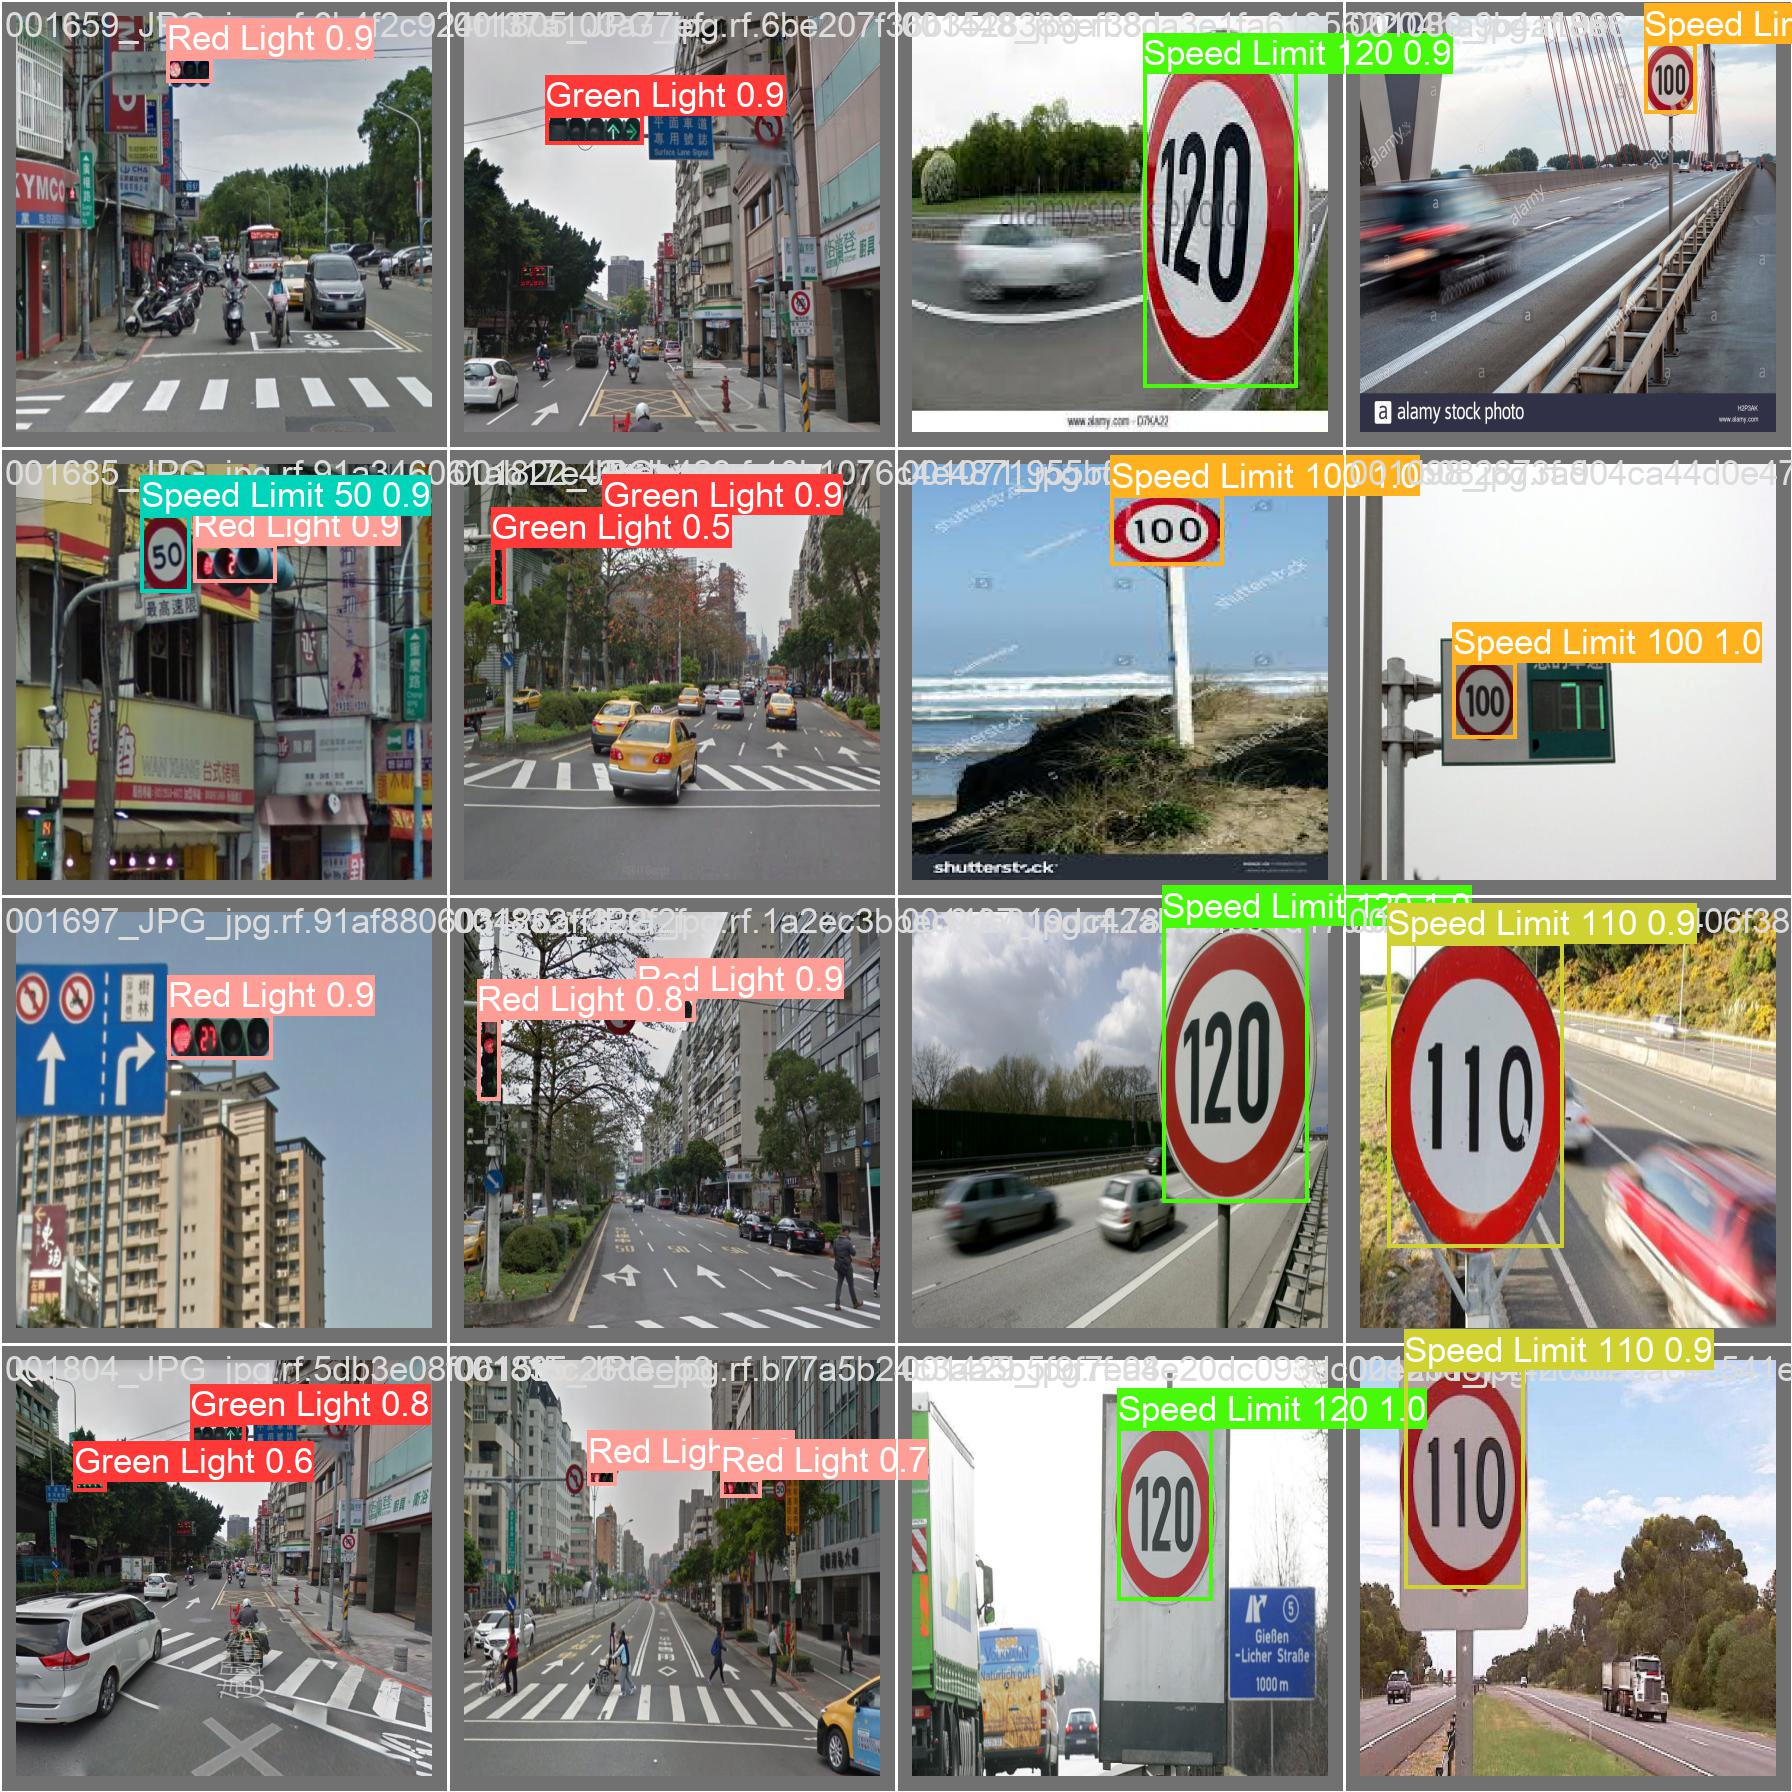

In [6]:
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=1000)

#### Checking Trained Model On Unseen Data

In [9]:
!python detect.py --source runs/train/exp/unseen_images/ --weights best.pt

detect: weights=['best.pt'], source=runs/train/exp/unseen_images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/7 /home/affan/code/codes/object_detection/YoloV5/yolov5/runs/train/exp/unseen_images/1.jpg: 288x640 3 Red Lights, 46.6ms
image 2/7 /home/affan/code/codes/object_detection/YoloV5/yolov5/runs/train/exp/unseen_images/2.jpg: 384x640 2 Green Lights, 48.1ms
image 3/7 /home/affan/code/codes/object_detection/YoloV5/yolov5/runs

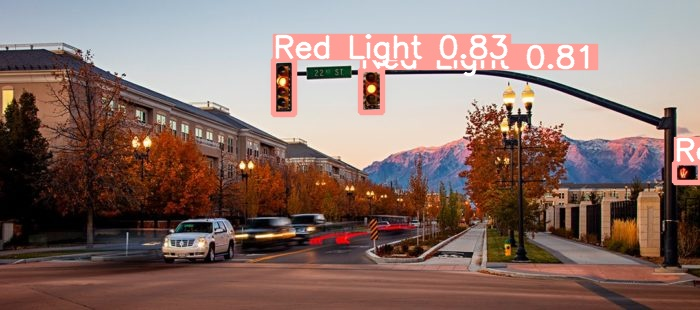

In [11]:
Image(filename='runs/detect/exp3/1.jpg')

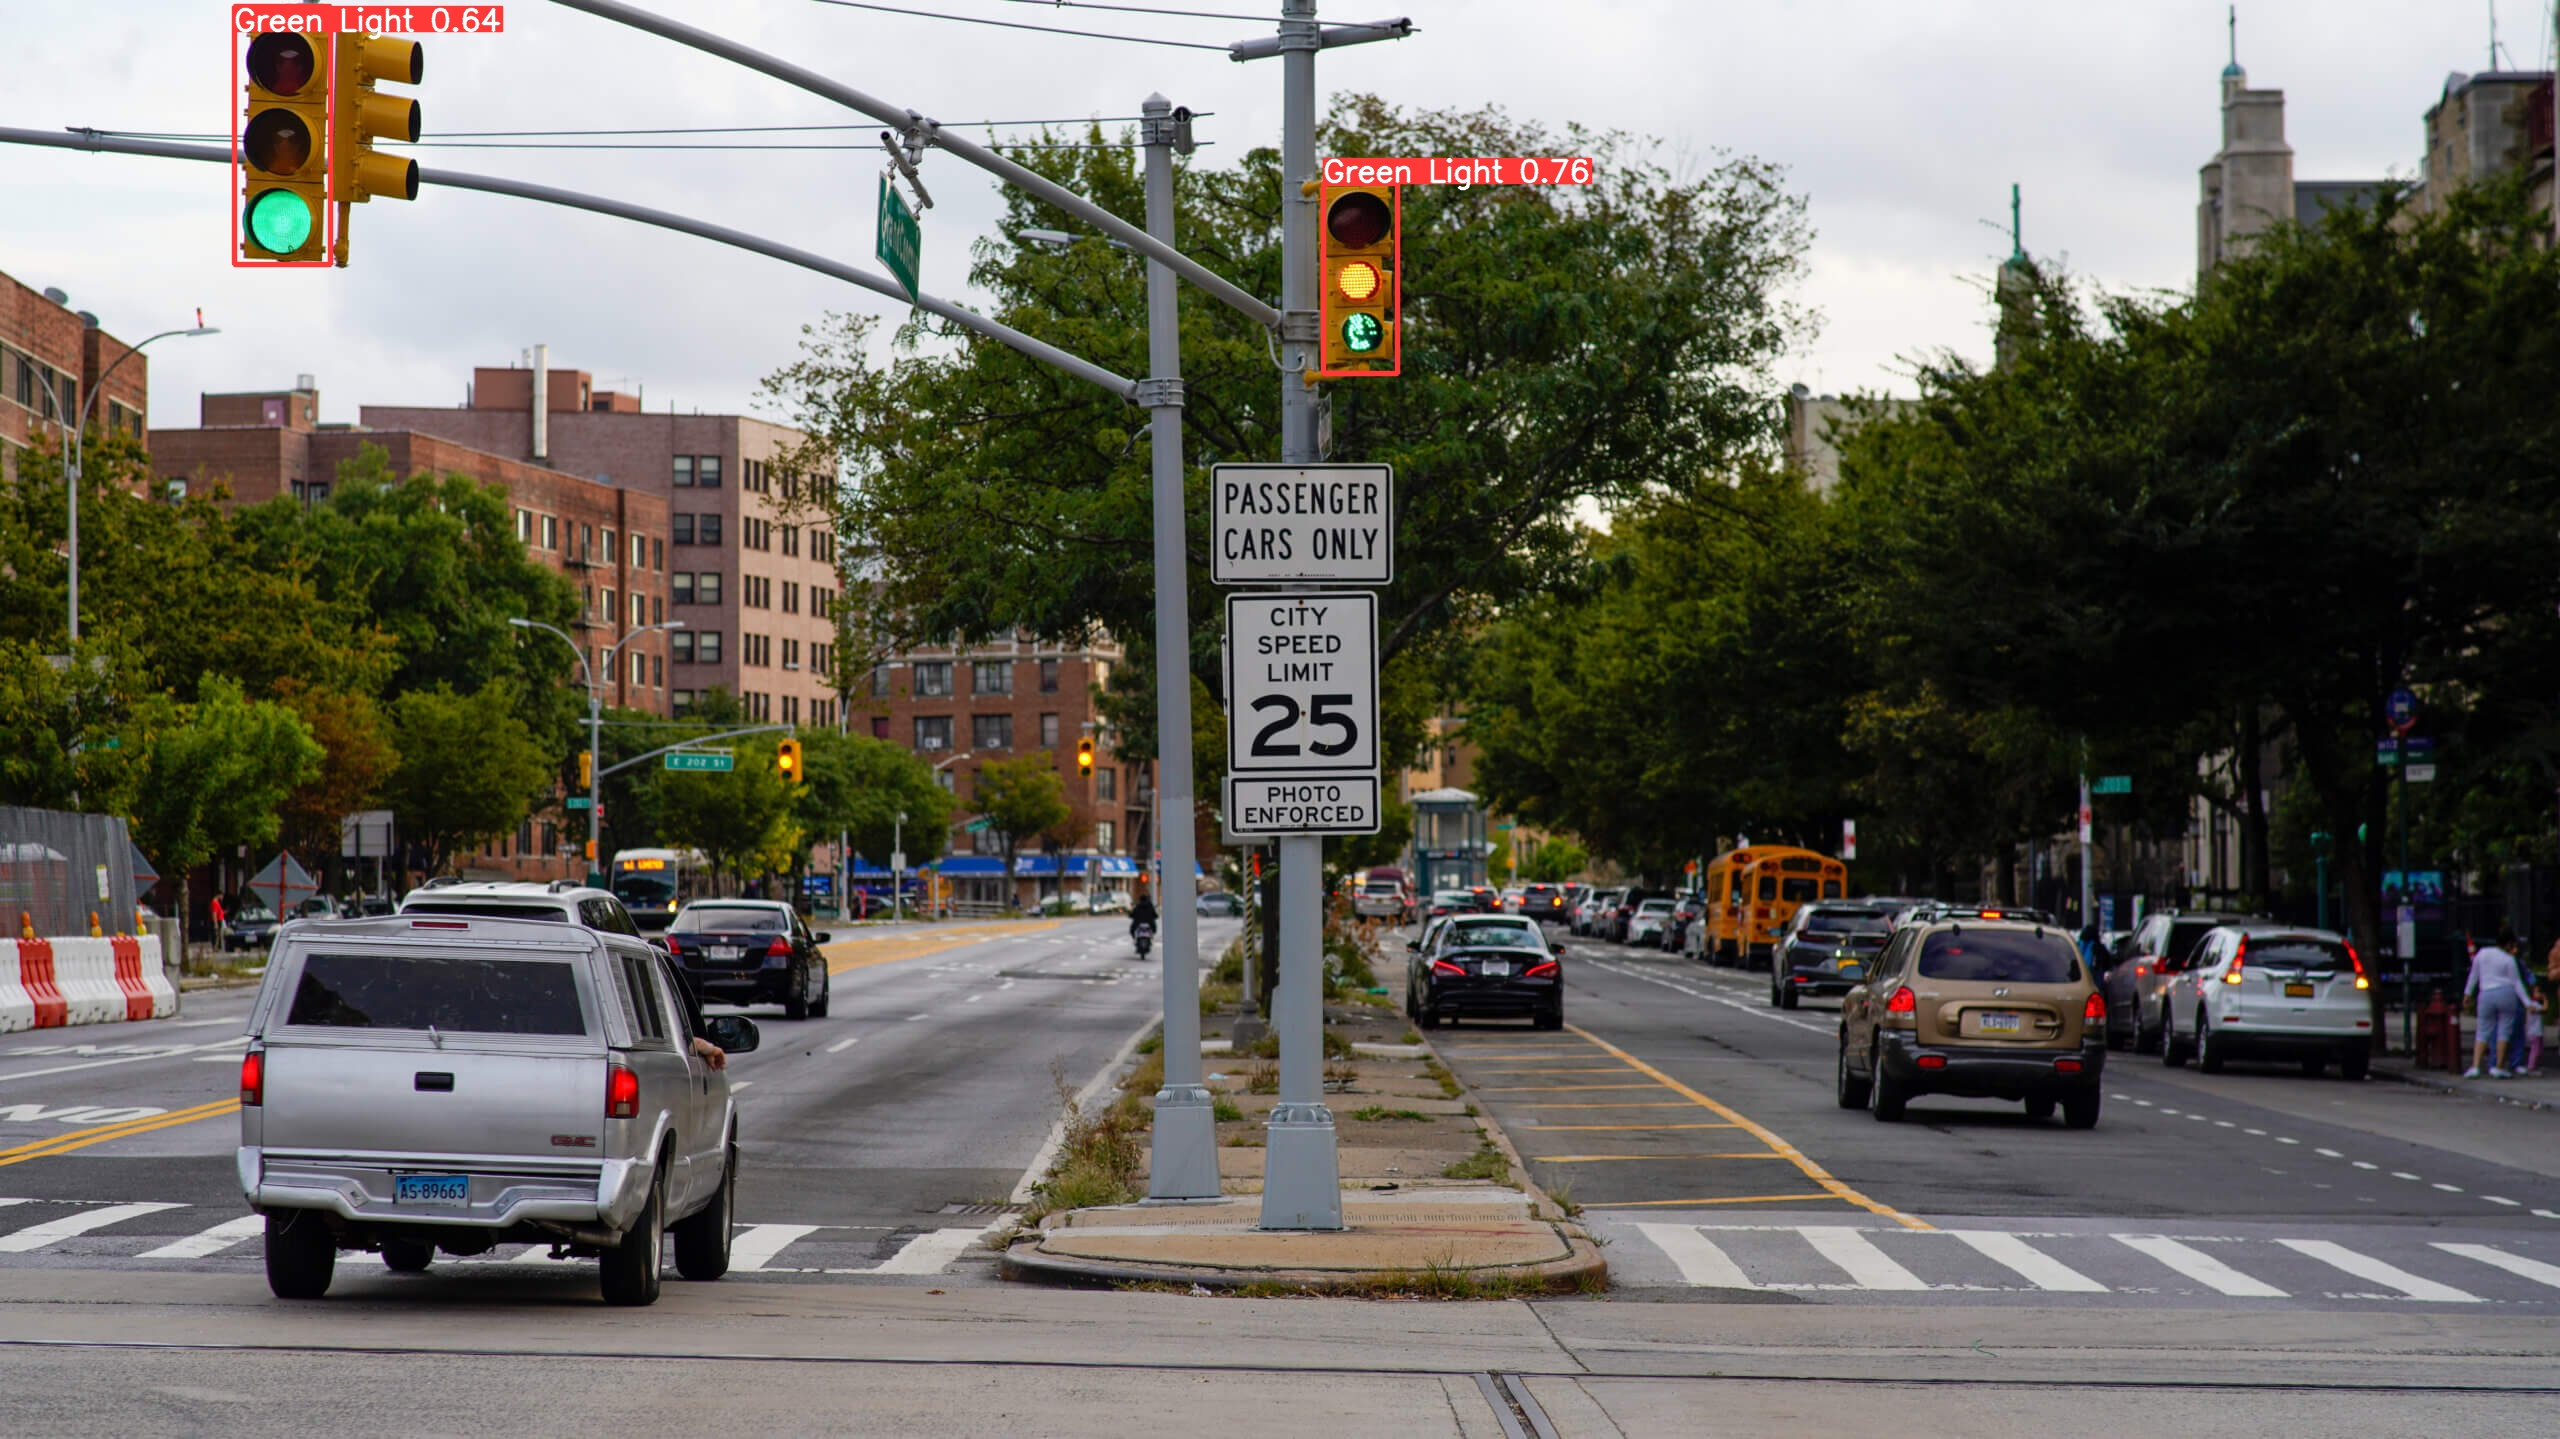

In [12]:
Image(filename='runs/detect/exp3/2.jpg')

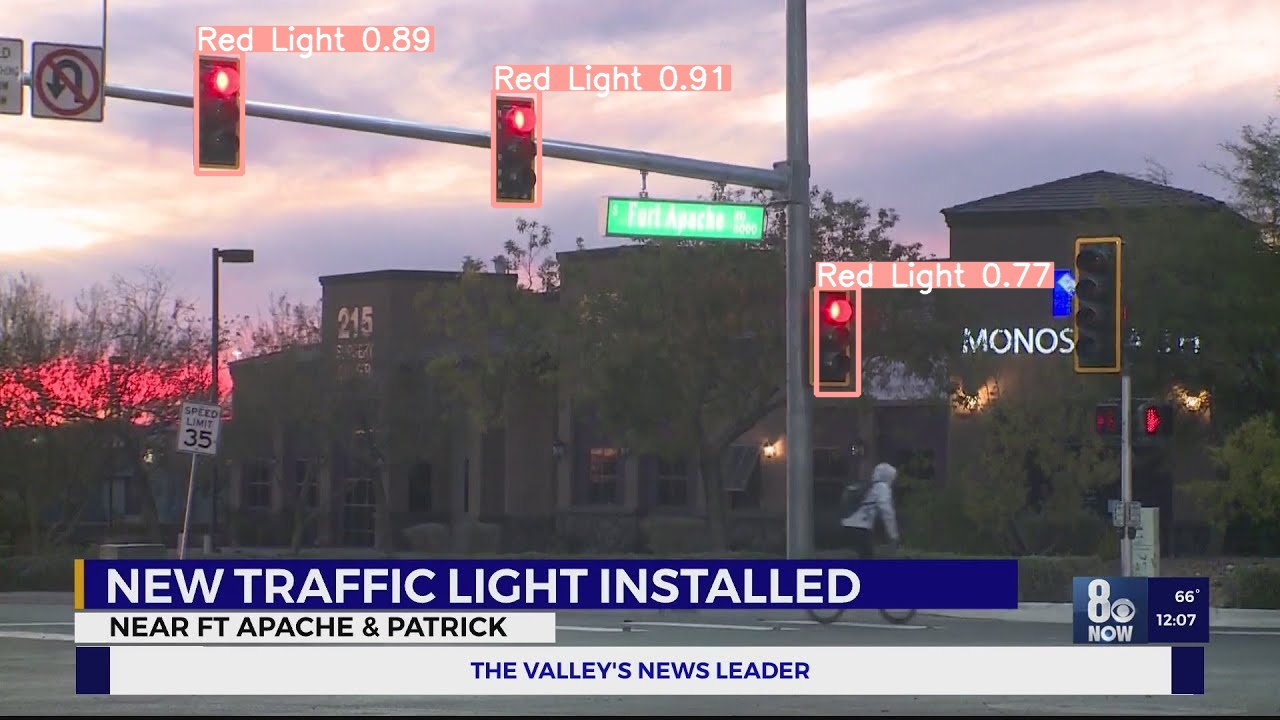

In [14]:
Image(filename='runs/detect/exp3/4.jpg')

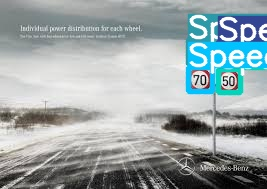

In [16]:
Image(filename='runs/detect/exp3/6.jpg')

### Different Deployment Framework Performance on RTX 3090

In [1]:
!python benchmarks.py --weights best.pt --imgsz 416 --device 0 --data data/data.yaml

benchmarks: weights=best.pt, imgsz=416, batch_size=1, data=data/data.yaml, device=0, half=False, test=False, pt_only=False, hard_fail=False
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /home/affan/code/codes/object_detection/YoloV5/traffic_sign_detect
                 Class     Images  Instances          P          R      mAP50   
                   all        801        944       0.95      0.868      0.941       0.79
           Green Light        801        122       0.84      0.689      0.797      0.441
             Red Light        801        108      0.913      0.682      0.798      0.467
       Speed Limit 100        801         52      0.906      0.904      0.972      0.852
       Speed Limit 110        801         17

### Checking TensorRT performance

In [2]:
!python val.py --weights best.engine --data data/data.yaml --img 416

val: data=data/data.yaml, weights=['best.engine'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Loading best.engine for TensorRT inference...
[02/20/2024-17:48:40] [TRT] [I] Loaded engine size: 32 MiB
[02/20/2024-17:48:40] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +30, now: CPU 0, GPU 30 (MiB)
[02/20/2024-17:48:40] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +16, now: CPU 0, GPU 46 (MiB)
val: Scanning /home/affan/code/codes/object_detection/YoloV5/traffic_sign_detect
                 Class     Images  Instances          P          R      mAP50 

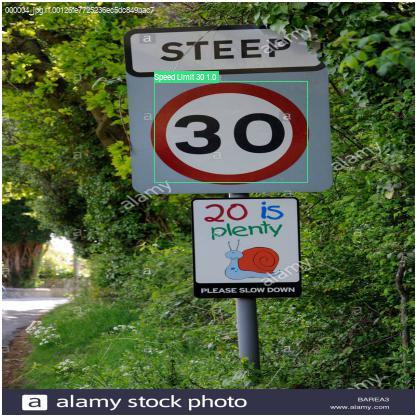

In [5]:
Image('runs/val/exp25/val_batch2_pred.jpg')

### Generating tflite Model for Android Application

In [10]:
!python export.py --weights best.pt --include tflite --device 0 --half --img 416

export: data=data/coco128.yaml, weights=['best.pt'], imgsz=[416], batch_size=1, device=0, half=True, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from best.pt with output shape (1, 10647, 20) (13.7 MB)
2024-02-20 17:59:43.913293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 17:59:43.913352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for

In [11]:
!python val.py --weights best-fp16.tflite --data data/data.yaml --img 416

val: data=data/data.yaml, weights=['best-fp16.tflite'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.11.5 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

2024-02-20 18:00:12.099336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 18:00:12.099393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 18:00:12.100001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attemp

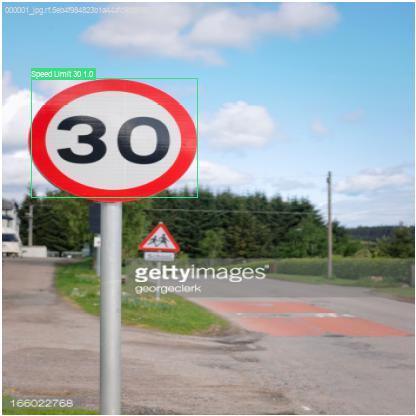

In [13]:
Image('runs/val/exp27/val_batch0_pred.jpg')

### References
https://www.kaggle.com/datasets/pkdarabi/cardetection<br>
https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#3-select-a-model